# Subplots

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# plt.subplot?

<IPython.core.display.Javascript object>


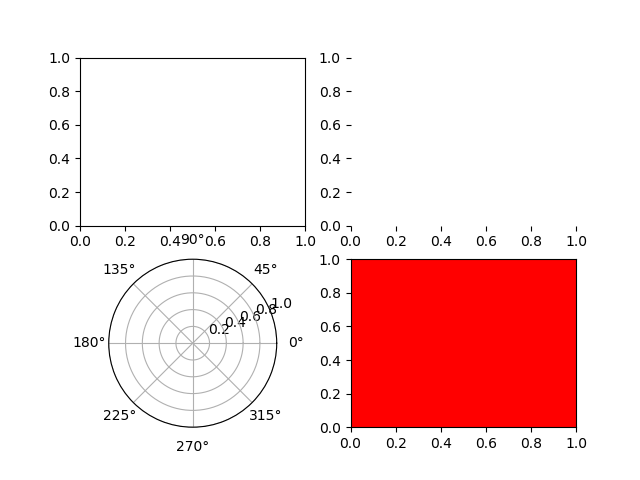

/home/mariuki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


In [2]:
plt.subplot(221)

# equivalent but more general
ax1=plt.subplot(2, 2, 1)

# add a subplot with no frame
ax2=plt.subplot(222, frameon=False)

# add a polar subplot
plt.subplot(223, projection='polar')

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')
    
# delete ax2 from the figure
plt.delaxes(ax2)

# add ax2 to the figure again
plt.subplot(ax2)

<IPython.core.display.Javascript object>


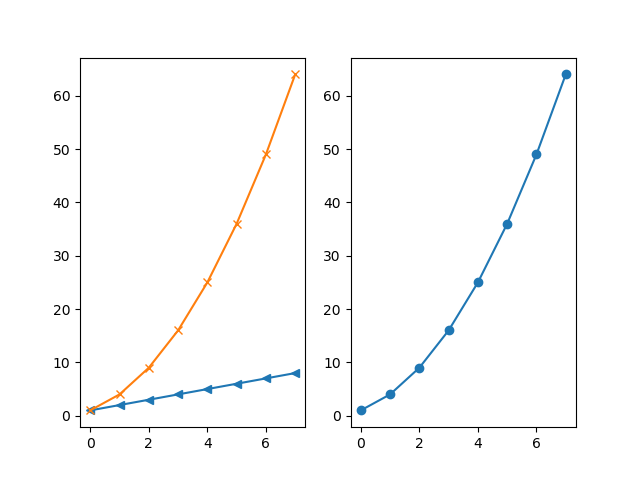

In [3]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes

plt.subplot (1, 2, 1)

linear_data = np.array([1, 2, 3, 4, 5, 6, 7, 8])

plt.plot(linear_data, '-<')

In [4]:
exponential_data = linear_data**2

#subplor with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [5]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

/home/mariuki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<IPython.core.display.Javascript object>


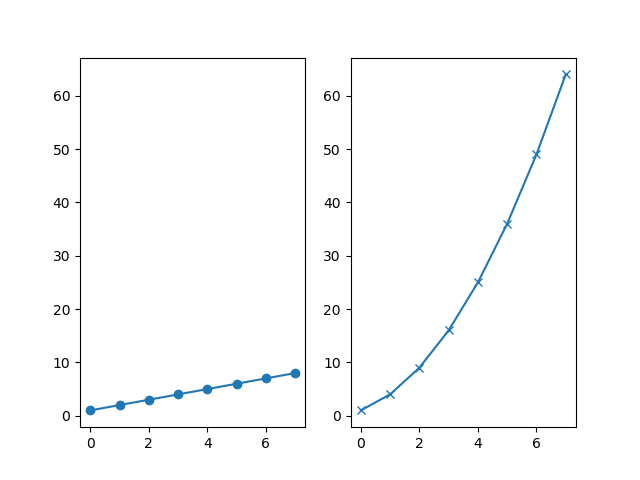

In [6]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


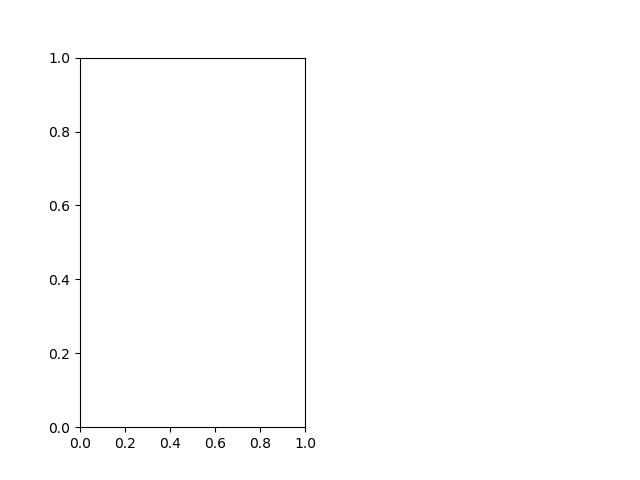

/home/mariuki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


True

In [7]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1, 2, 1) == plt.subplot(121)

<IPython.core.display.Javascript object>


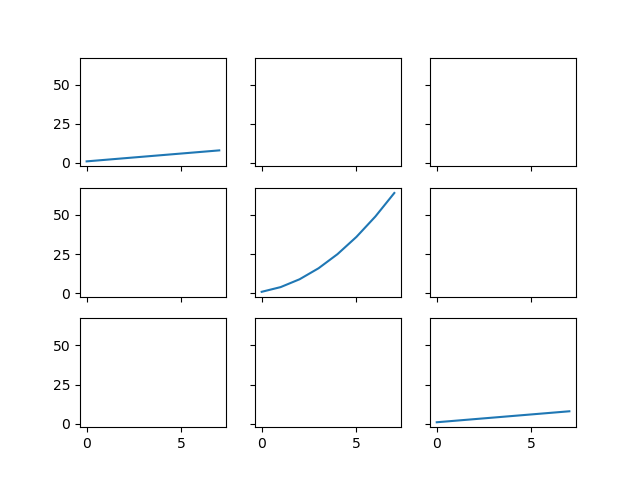

In [8]:
#create a 3x3 grid of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex = True, sharey = True)
#plot the linear data on 1st and 9th, and exponential on 5th subplot axes
ax1.plot(linear_data, '-')
ax5.plot(exponential_data, '-')
ax9.plot(linear_data, '-')

In [9]:
# Set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [10]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

<IPython.core.display.Javascript object>


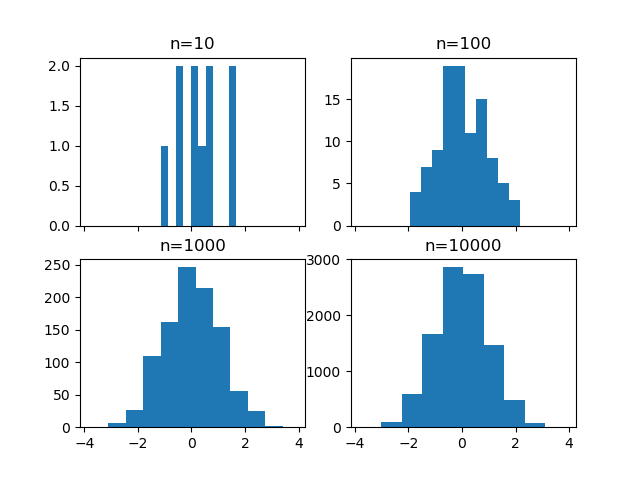

In [11]:
# Create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex = True)
axs = [ax1, ax2, ax3, ax4]
#draw # n= 10,100,1000 and 10000 samples from the normal distribution and plot correspondig histograms
for n in range (0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


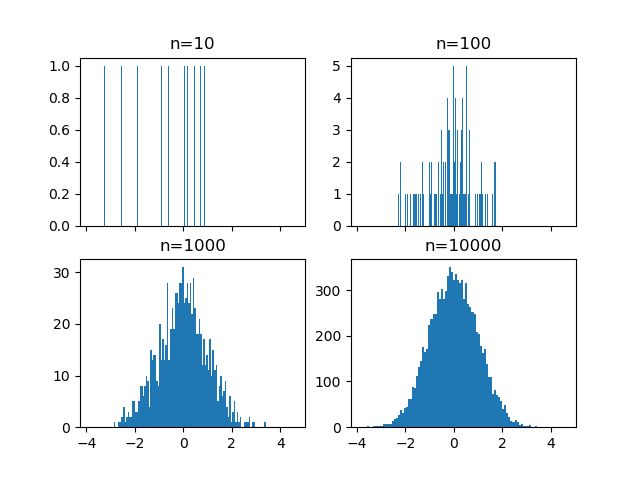

In [12]:
# Repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex = True)
axs = [ax1, ax2, ax3, ax4]

for n in range (0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample, bins = 100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


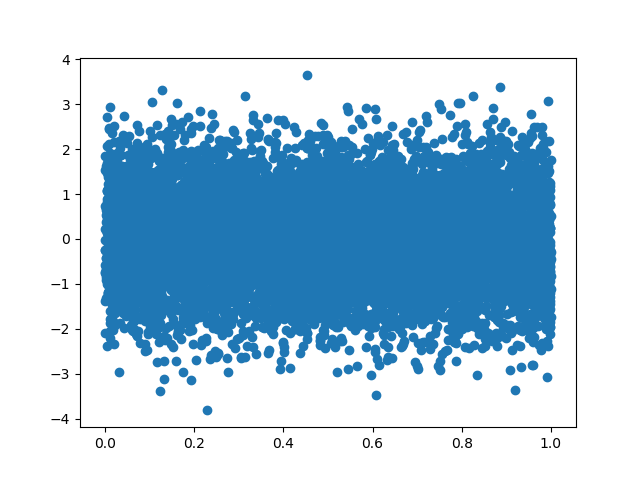

In [13]:
plt.figure()

Y = np.random.normal(loc = 0.0, scale = 1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X, Y)

<IPython.core.display.Javascript object>


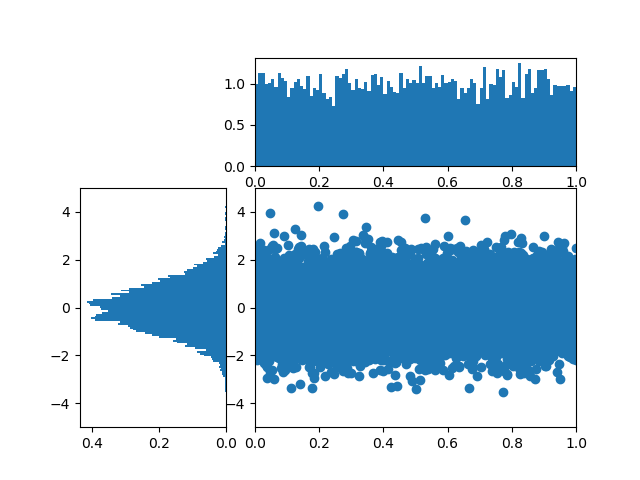

In [14]:
#use grid spec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure() 
gspec = gridspec.GridSpec(3,3)

top_histogram = plt.subplot (gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [15]:
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins = 100, orientation = 'horizontal')

In [16]:
# Clear the histograms and plot normed histograms

top_histogram.clear()
top_histogram.hist(X, bins = 100, density = True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation = 'horizontal', density = True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [17]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

# Box and Whisker Plots

In [18]:
import pandas as pd

normal_sample = np.random.normal(loc=0.0, scale = 1.0, size =10000)
random_sample = np.random.random(size = 10000)
gamma_sample =  np.random.gamma(2, size = 10000)

df =  pd.DataFrame({'normal': normal_sample,
                    'random': random_sample, 
                    'gamma': gamma_sample})

In [19]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.001104,0.499520,2.001966
std,1.010521,0.288811,1.406701
min,-3.848890,0.000013,0.013379
25%,-0.697678,0.245036,0.957726
50%,0.003379,0.500290,1.694623
75%,0.701339,0.750189,2.695139
max,3.527112,0.999854,12.550424


<IPython.core.display.Javascript object>


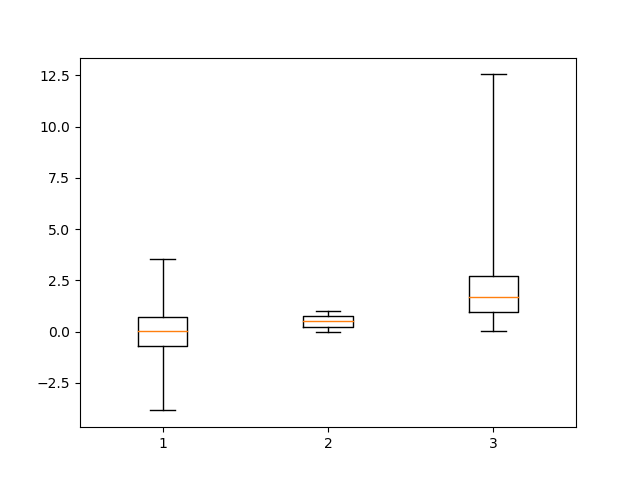

In [20]:
plt.figure()
# create a boxplor of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

In [21]:
# clear de current figure
plt.clf()
#plotboxplots for all three of df's columns 
_ = plt.boxplot([ df['normal'], df['random'], df['gamma']], whis='range')

<IPython.core.display.Javascript object>


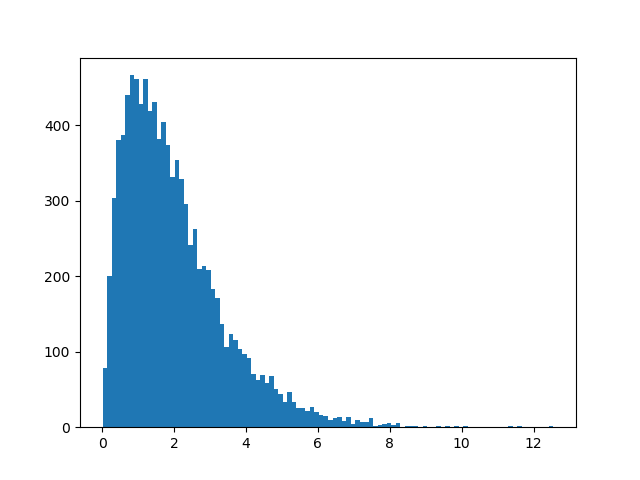

In [23]:
plt.figure()
_ = plt.hist(df['gamma'], bins = 100)

<IPython.core.display.Javascript object>


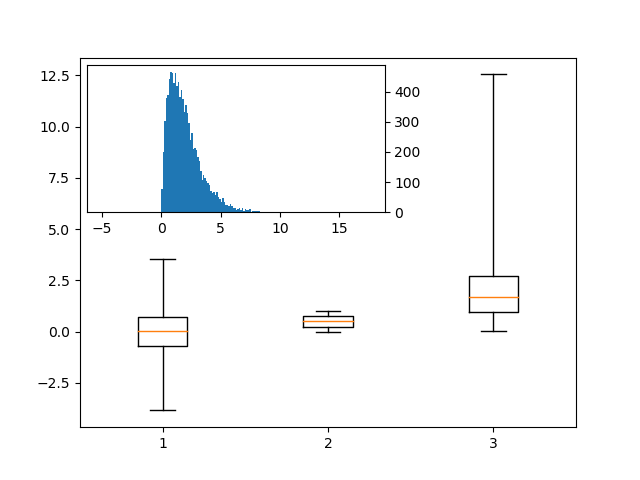

In [22]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot( [df['normal'], df['random'], df['gamma']], whis='range')
#overlay axis on top of another
ax2 = mpl_il.inset_axes(plt.gca(), width = '60%', height = '40%', loc = 2)
ax2.hist(df['gamma'], bins =100)
ax2.margins(x=0.5)

In [24]:
#switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


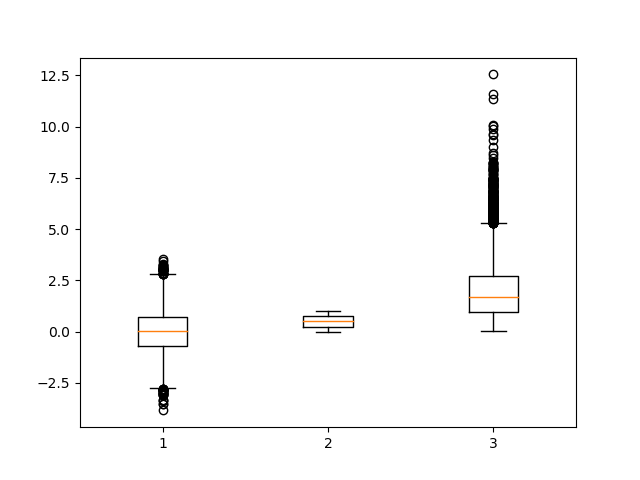

In [25]:
#if'whis argumrntisnt passed,boxplot defaults to showing 1.5*interquartille
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']])

# Heatmaps

<IPython.core.display.Javascript object>


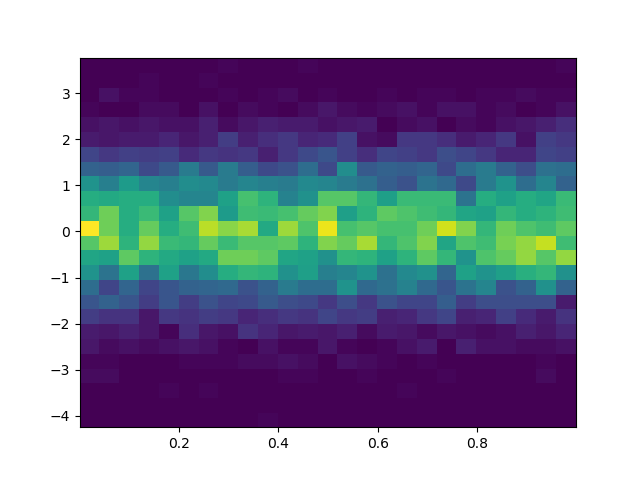

In [29]:
plt.figure() 

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_=plt.hist2d(X,Y, bins=25)

<IPython.core.display.Javascript object>


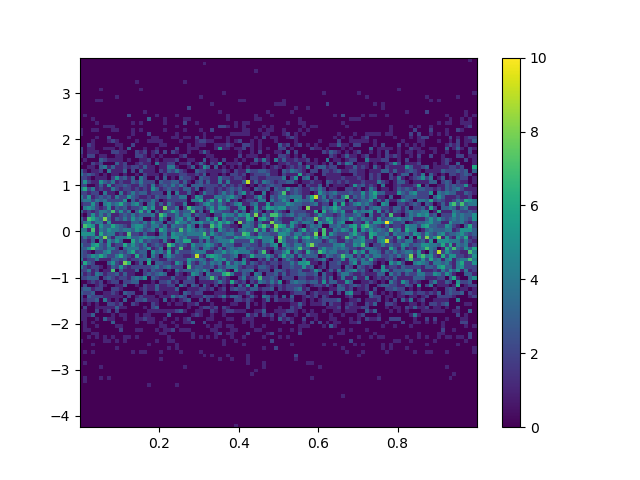

In [30]:
plt.figure()

_= plt.hist2d(X,Y, bins= 100)

In [31]:
# add a calorbar legend
plt.colorbar()

# Animations

In [37]:
import matplotlib.animation as animation
import numpy as np

n = 100
x=np.random.randn(100)

In [56]:
# create the function that will do the plotting, where curr is the current frame

def update(curr):
    #check if animation is at the last frame, and  if so, stop the animation a
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins= np.arange(-4,4,0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frecuency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n={}'.format(curr), [3, 20])

<IPython.core.display.Javascript object>


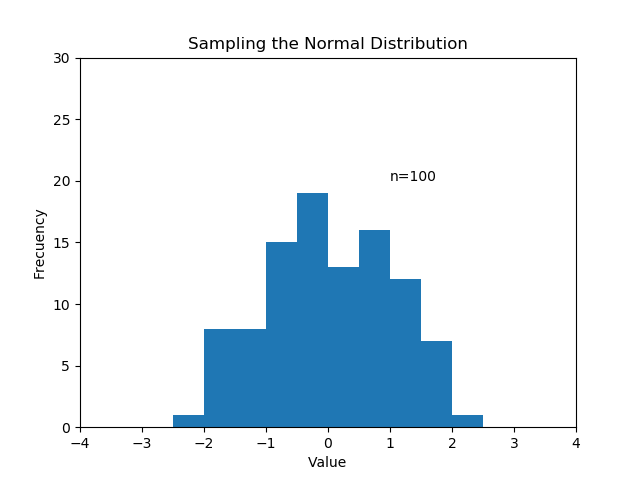

In [55]:
fig = plt.figure()
a=animation.FuncAnimation(fig, update, interval = 100)

# Interactivity

<IPython.core.display.Javascript object>


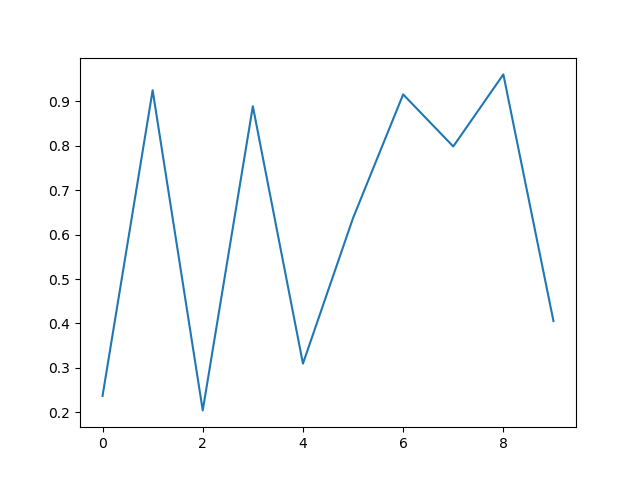

In [58]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Ecent at pixels{},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))
    
    #tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
    plt.gfc().canvas.mpl_connect('button_press_event', onlcik)

In [63]:
from random import shuffle

origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'México']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                  'weight': np.random.rand(10),
                  'origin': origins})
df

,height,weight,origin
0,0.433691,0.283058,USA
1,0.442839,0.921668,UK
2,0.826979,0.066580,China
3,0.242361,0.119224,Brazil
4,0.644841,0.261134,Germany
5,0.631174,0.346076,India
6,0.703826,0.623145,Iraq
7,0.541433,0.335336,Chile
8,0.701878,0.628218,Canada
9,0.581168,0.935193,México


<IPython.core.display.Javascript object>


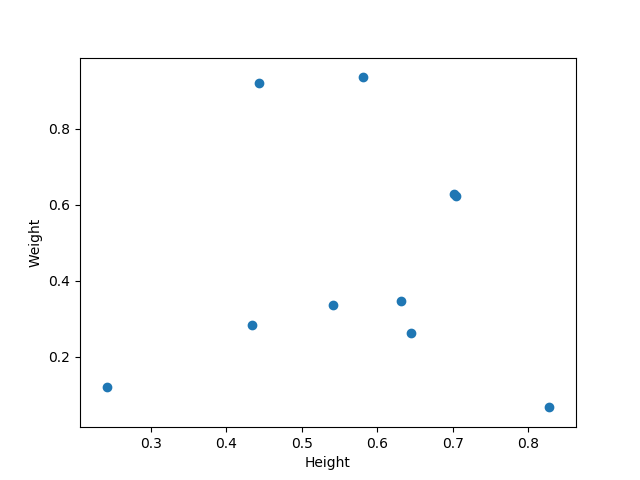

Text(0.5, 0, 'Height')

In [64]:
plt.figure()
#picker = 5 means the mouse doesn have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [72]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))
#tell mpl_connect we want to pass a pick_event into onpick when te event is hat the event 
plt.gcf().canvas.mpl_connect('pickevent', onpick)   

9